## Problem Statement

You work for a fitness company and have gathered data on the fitness activities of 50 individuals using fitness trackers. The dataset is stored in an Excel file named "fitness_data.xlsx" and includes the following columns:

- **name:** Name of the person.
- **steps_taken:** The number of steps taken by individuals.
- **calories_burned:** The estimated calories burned by individuals.
- **sleep_duration(hours):** The number of hours of sleep individuals got on that day.
- **water_intake(ounces):** The amount of water individuals consumed.


In [9]:
import pandas as pd
df = pd.read_excel('D:\\CodeBasics\\MathsnStats_Exercise2\\fitness_data.xlsx')

**Import Necessary Libraries**

In [26]:
import numpy as np
from matplotlib import pyplot as plt

## Task1

1. Import the data from the "fitness_data.xlsx" Excel file.
2. Display the first few rows of the dataset to get an overview.
3. Calculate and display basic statistics (mean, median, min, max) for each column.


In [36]:
df.shape
df.describe()

,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
count,50.000000,50.000000,50.000000,50.000000
mean,10316.000000,4418.000000,7.396000,79.600000
std,1177.052701,370.708092,1.660951,14.457538
min,8000.000000,3700.000000,4.000000,30.000000
25%,9625.000000,4200.000000,7.000000,70.000000
50%,10250.000000,4400.000000,7.200000,80.000000
75%,11000.000000,4700.000000,7.500000,90.000000
max,15000.000000,5500.000000,18.000000,100.000000


## Task2:  Range and IQR

1. Calculate the range of "steps_taken".
2. Calculate the range of "calories_burned".
3. Calculate the Interquartile Range (IQR) for "sleep_duration(hours)".
4. Calculate the IQR for "water_intake(ounces)".

In [25]:
# Calculate the range of "steps_taken" for the entire week
max_steps_taken = df['steps_taken'].max()
min_steps_taken = df['steps_taken'].min()
steps_range = max_steps_taken - min_steps_taken
print('steps range ',steps_range)


# Calculate the range of "calories_burned" for the entire week
max_steps_taken = df['calories_burned'].max()
min_steps_taken = df['calories_burned'].min()
calories_range = max_steps_taken - min_steps_taken
print('calories range ',calories_range)
# Calculate the Interquartile Range (IQR) for "sleep_duration(hours)"
Q1, Q3 = df['sleep_duration(hours)'].quantile([0.25, 0.75])
Q1, Q3
sleep_duration_IQR = Q3 - Q1
print('this is sleep duration IQR ',sleep_duration_IQR)
# Calculate the IQR for "water_intake(ounces)"
wQ1, wQ3 = df['water_intake(ounces)'].quantile([0.25, 0.75])
wQ1, wQ3
w_sleep_duration_IQR = wQ3 - wQ1
print('This is water_intake(ounces) IQR ',w_sleep_duration_IQR)

# Print the results


steps range  7000
calories range  1800
this is sleep duration IQR  0.5
This is water_intake(ounces) IQR  20.0


## Task3: Box Plot for Steps Taken

- Create a box plot for the "steps_taken" column to visualize the distribution of daily steps taken by individuals. Interpret the box plot and identify any outliers.

<module 'matplotlib.pyplot' from 'C:\\Users\\SAMIR\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

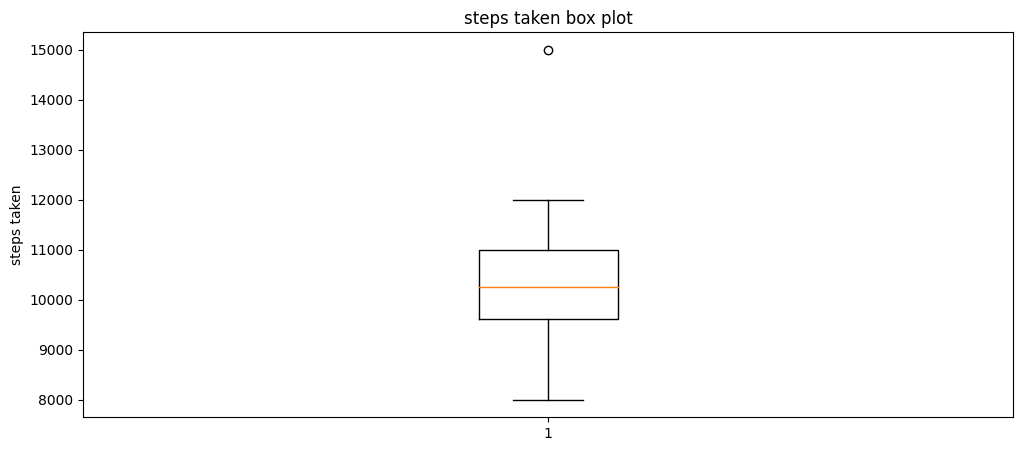

In [33]:


# Set the figure size
plt.figure(figsize=(12,5))

# Create a box plot for "Steps Taken"
plt.boxplot(df['steps_taken'])

# Set the title and labels
plt.title('steps taken box plot')
plt.ylabel('steps taken')

# Ensure proper layout and display the plot
plt

#### Observations

- Most individuals appear to have a median daily step count around 10,000 as indicated by the orange line within the box.
- The presence of an outlier at 15,000 indicates that there is at least one individual who took an exceptionally high number of steps. This could be due to various reasons, such as an unusually active day or a measurement error.


## Task4: 

- Use the IQR method to identify and label outliers in the "sleep_duration(hours)" column.

In [39]:
#defininig the function
def detect_outliers(data, column):
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3-Q1

#for getting the upper and lower limits
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

#Creating new column for Outliers
    data['outliers'] = data[column].apply(lambda x :'Outlier' if (x<lower_limit or x>upper_limit) else 'Normal')

    return data, lower_limit, upper_limit
    


In [41]:
#Calling the function
df, lower, upper = detect_outliers(df, 'sleep_duration(hours)')
print('lower ', lower)
print('upper ',upper)


lower  6.25
upper  8.25


In [44]:
# Identify and label outliers
df[df['outliers']=='Outlier']


# Display the outliers


,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces),outliers
21,Elena,11700,4900,18.0,100,Outlier
30,Siddharth,11300,4700,4.0,75,Outlier
